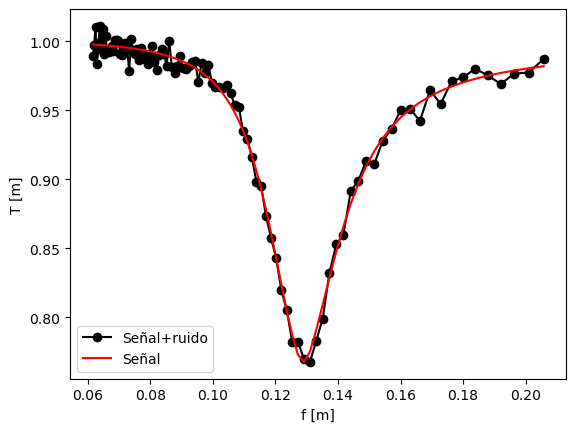

In [1]:
from funciones.ruido import ruido
from matplotlib import pyplot as plt
import numpy as np
from funciones.fscanTH2 import fscanTH2
from funciones.focalcurr import focalcurr
from funciones.funcion import funcion
import pandas as pd
import os

######################## PARAMETROS EXPERIMENTALES.
df = pd.read_csv('Parametros_fscan.txt', delimiter = "\t",index_col=0)



corriente = np.arange(0, 202, 2)  #Current [mA]
######################## PARAMETROS QUE SE ASUMEN COMO LOS REALES
focal = focalcurr('opt2', corriente)  #focal distance [m]
N = 11 #number of terms in the sum of the theoretical formula
#NN = int(df.loc['NN']['Valor']) # sample size
beta = 500e-11 # TPA seed in (m/W )
L= 0.70e-3 # thickness in (m).
Pavg = 95e-3# Average power in (W)
Tp = 2e-9 # pulse width FWHM in (s)
wl = 1063.5e-9 #central wavelength in (m)
D = 1.5e-3 # beam diameter in (m)
ds = 130e-3# Distance EFTL-sample (m)
Cf = 1.1 # beam correction coeff
alfa = 975 # linear absorption in (1/m) (CdS@790 -2.64e-11, ZnSe@790 4.7720, CdSe@790 369.8)alfa_e = float(df.loc['alfa_e']['Valor'])*float(df.loc['alfa_e']['Valor2'])
R =0.33 # reflection percentage (CdS@790 = 0.15670, ZnSe@790 0.18164)
freq = 11e3 #Frecuencia en HZ
n=2
sigmas=0.006  #Desviación estandar.
########################

path = os.getcwd() + '\\Datos\data_simulada.txt'  # Ruta de archivo donde se guardaran los datos simulados
T = fscanTH2(focal, beta, L, Pavg, Tp, wl, D, ds, Cf, alfa, R, N)  #Señal simulada
data = np.column_stack([corriente, ruido(T,sigmas)]) # corriente, señal simulada con ruido
np.savetxt(path, data, fmt=['%d','%.8f'])

#EJEMPLO
plt.plot(focal, ruido(T,sigmas),color='k',marker='o',label="Señal+ruido")
plt.plot(focal, T,color='r',label="Señal")
plt.xlabel("f [m]")
plt.ylabel("T [m]")
plt.legend()

# Diametro

number of betas: 1
betas: [5.125e-09]
number of betas: 3
betas: [4.81250000e-09 2.69140625e-09 4.06250000e-09]
number of betas: 4
betas: [3.77734375e-09 3.38281250e-09 4.18750000e-09 3.75000000e-09]
number of betas: 5
betas: [2.61328125e-09 3.89843750e-09 4.12500000e-09 4.81250000e-09
 4.87500000e-09]
number of betas: 3
betas: [4.37304688e-09 4.57812500e-09 4.37500000e-09]
number of betas: 2
betas: [4.25e-09 5.00e-09]
number of betas: 4
betas: [5.46875e-09 4.12500e-09 4.43750e-09 5.00000e-09]
number of betas: 2
betas: [4.4375000e-09 5.2109375e-09]
number of betas: 3
betas: [5.58203125e-09 3.93750000e-09 3.93750000e-09]
number of betas: 4
betas: [5.6250000e-09 4.4453125e-09 4.6406250e-09 3.5625000e-09]
number of betas: 5
betas: [3.62500000e-09 4.84375000e-09 3.93750000e-09 4.50000000e-09
 3.49804688e-09]
betas_f [5.12500000e-07 3.71010167e-07 3.72483391e-07 4.01353695e-07
 4.42949459e-07 4.47170279e-07 4.79600303e-07 4.93749290e-07
 4.38511227e-07 4.60936011e-07 4.16801503e-07]


array([5.12500000e-07, 3.71010167e-07, 3.72483391e-07, 4.01353695e-07,
       4.42949459e-07, 4.47170279e-07, 4.79600303e-07, 4.93749290e-07,
       4.38511227e-07, 4.60936011e-07, 4.16801503e-07])

<Figure size 2400x1000 with 0 Axes>

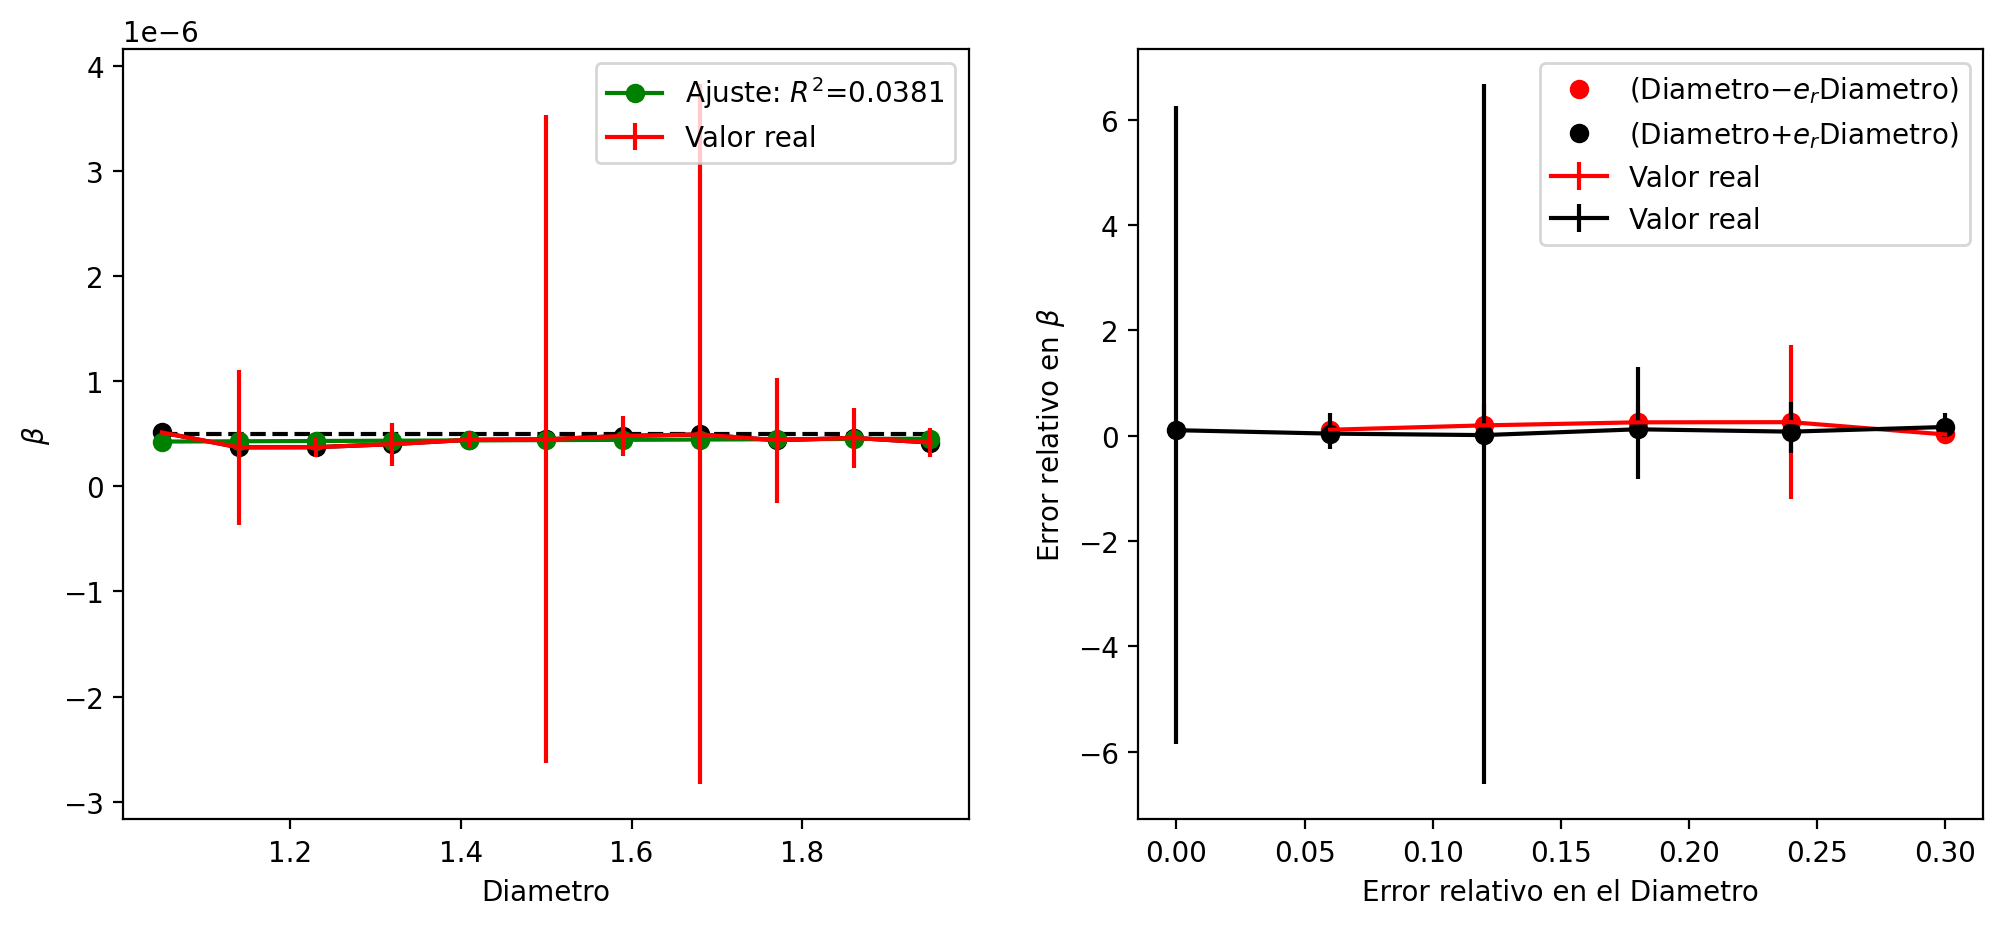

In [4]:
ths = 0.01
funcion('D_c', ths, 0.3, sigmas, N)

# Longitud

number of betas: 7
betas: [3.375000e-09 3.359375e-09 4.250000e-09 4.500000e-09 3.312500e-09
 3.750000e-09 3.875000e-09]
number of betas: 4
betas: [4.6250e-09 4.8125e-09 5.2500e-09 4.8750e-09]
number of betas: 3
betas: [5.5000e-09 4.5625e-09 2.8750e-09]
number of betas: 4
betas: [4.25e-09 3.75e-09 4.75e-09 3.50e-09]
number of betas: 5
betas: [4.5625e-09 4.2500e-09 4.8750e-09 4.7500e-09 3.7500e-09]
number of betas: 4
betas: [4.937500e-09 2.640625e-09 4.718750e-09 3.437500e-09]
number of betas: 4
betas: [4.3750e-09 4.3125e-09 6.3750e-09 3.8125e-09]
number of betas: 2
betas: [5.25000000e-09 3.89257813e-09]
number of betas: 5
betas: [4.750000e-09 3.671875e-09 3.312500e-09 3.062500e-09 4.734375e-09]
number of betas: 2
betas: [4.546875e-09 3.750000e-09]
number of betas: 7
betas: [4.87500000e-09 4.06835938e-09 4.62500000e-09 3.61328125e-09
 5.37500000e-09 3.56250000e-09 5.23437500e-09]
betas_f [3.83357218e-07 4.92044687e-07 4.25385389e-07 3.99982882e-07
 4.41871766e-07 4.07986296e-07 4.5655072

array([3.83357218e-07, 4.92044687e-07, 4.25385389e-07, 3.99982882e-07,
       4.41871766e-07, 4.07986296e-07, 4.56550728e-07, 4.58804619e-07,
       3.99831565e-07, 4.10849345e-07, 4.53534948e-07])

<Figure size 2400x1000 with 0 Axes>

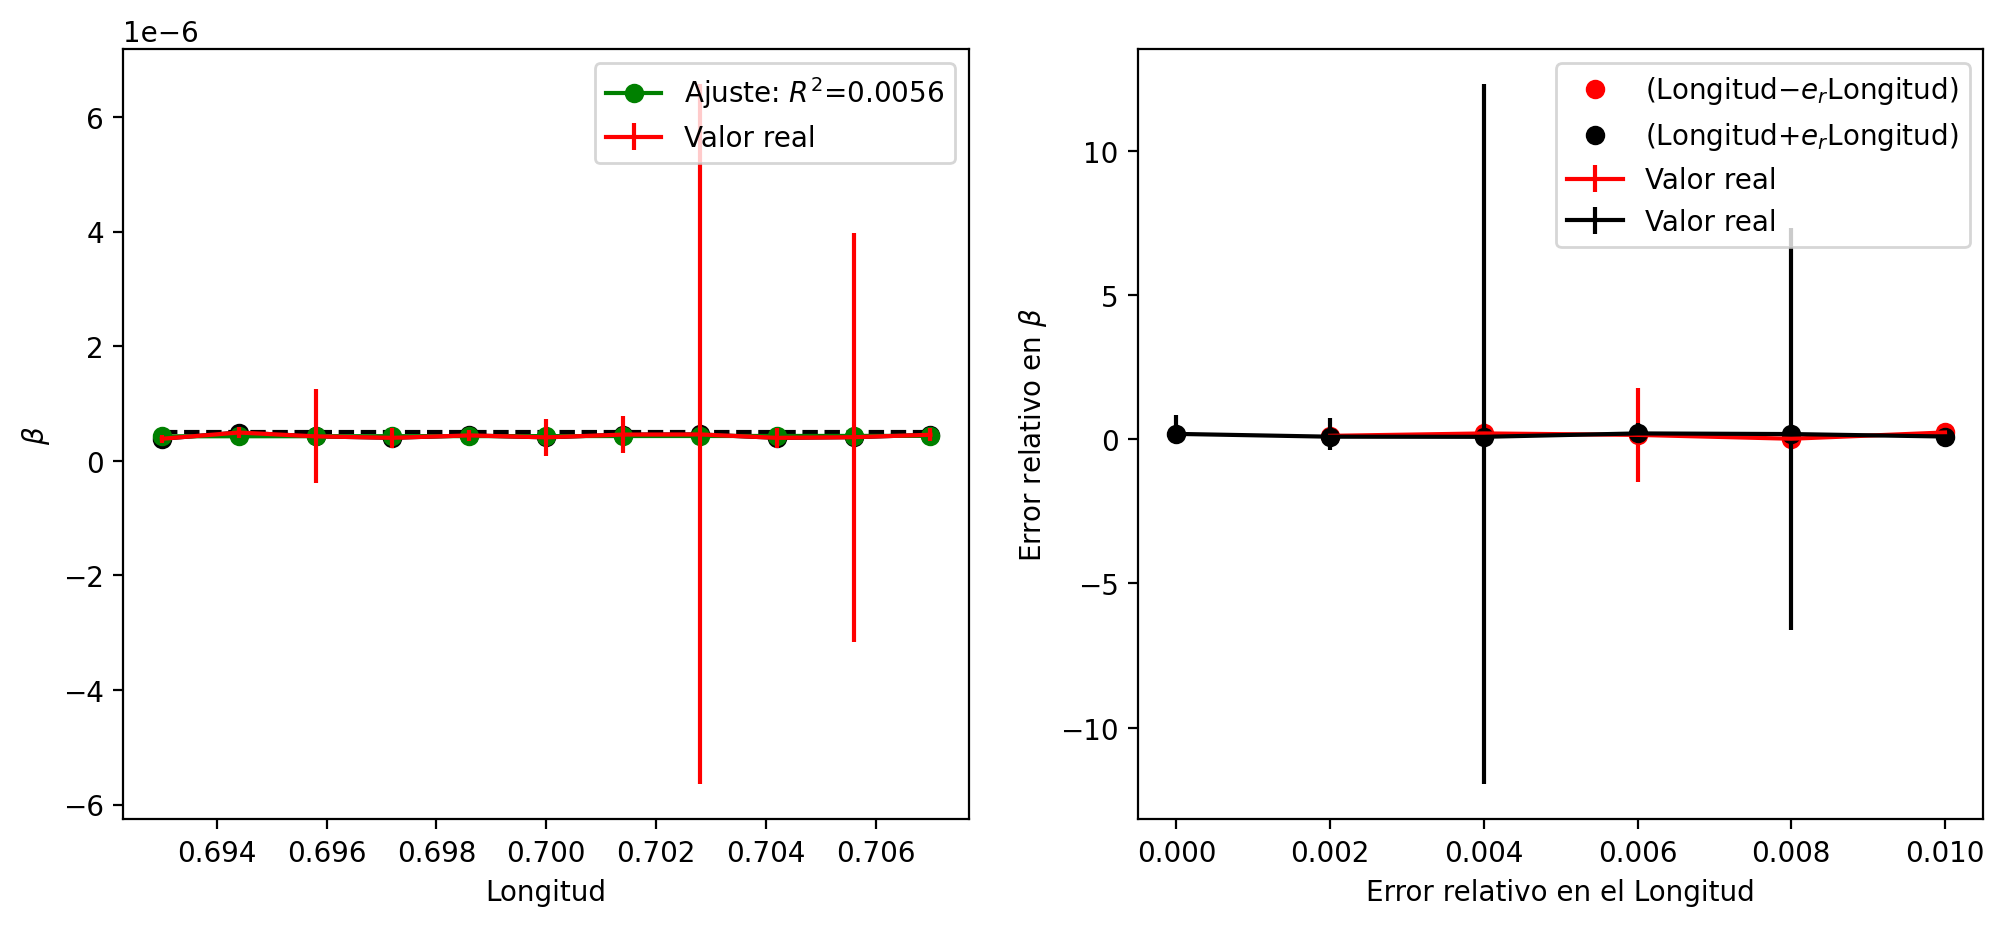

In [5]:
 funcion('L_c', 0.01, 0.01, sigmas,  N = 10)